In [2]:
import numpy as np
import matplotlib.pyplot as plt

Linear Algebra error at M=293: SVD did not converge in Linear Least Squares
Linear Algebra error at M=317: SVD did not converge in Linear Least Squares
Linear Algebra error at M=421: SVD did not converge in Linear Least Squares
Linear Algebra error at M=429: SVD did not converge in Linear Least Squares
Linear Algebra error at M=466: SVD did not converge in Linear Least Squares
Linear Algebra error at M=486: SVD did not converge in Linear Least Squares
Linear Algebra error at M=538: SVD did not converge in Linear Least Squares
Linear Algebra error at M=592: SVD did not converge in Linear Least Squares
Linear Algebra error at M=595: SVD did not converge in Linear Least Squares
Linear Algebra error at M=631: SVD did not converge in Linear Least Squares
Linear Algebra error at M=712: SVD did not converge in Linear Least Squares
Linear Algebra error at M=724: SVD did not converge in Linear Least Squares
Linear Algebra error at M=742: SVD did not converge in Linear Least Squares
Linear Algeb

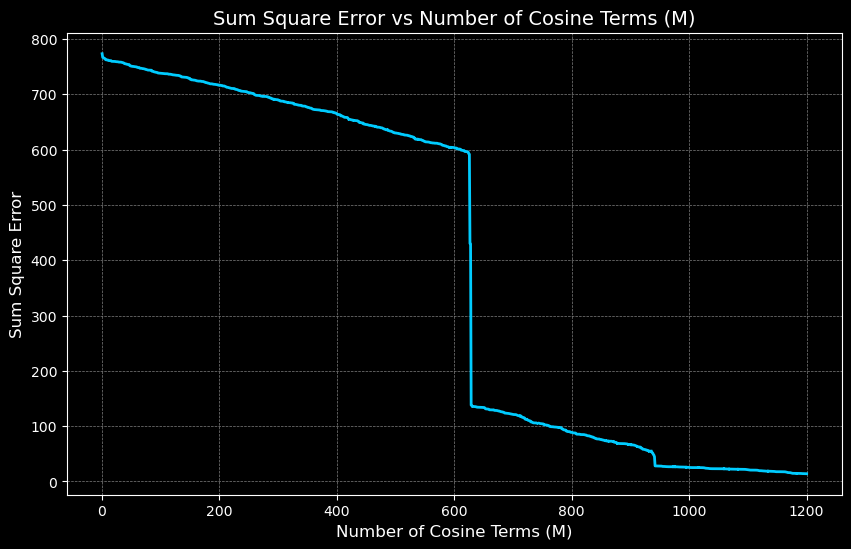

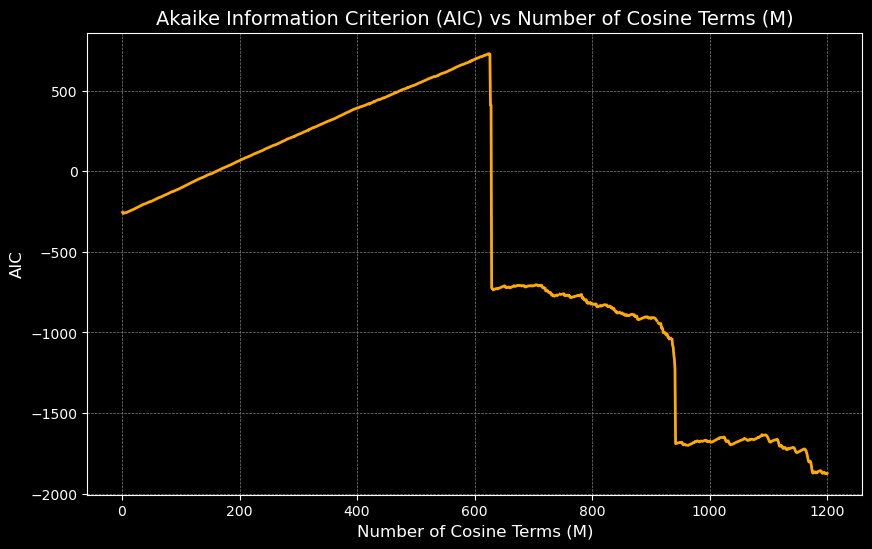

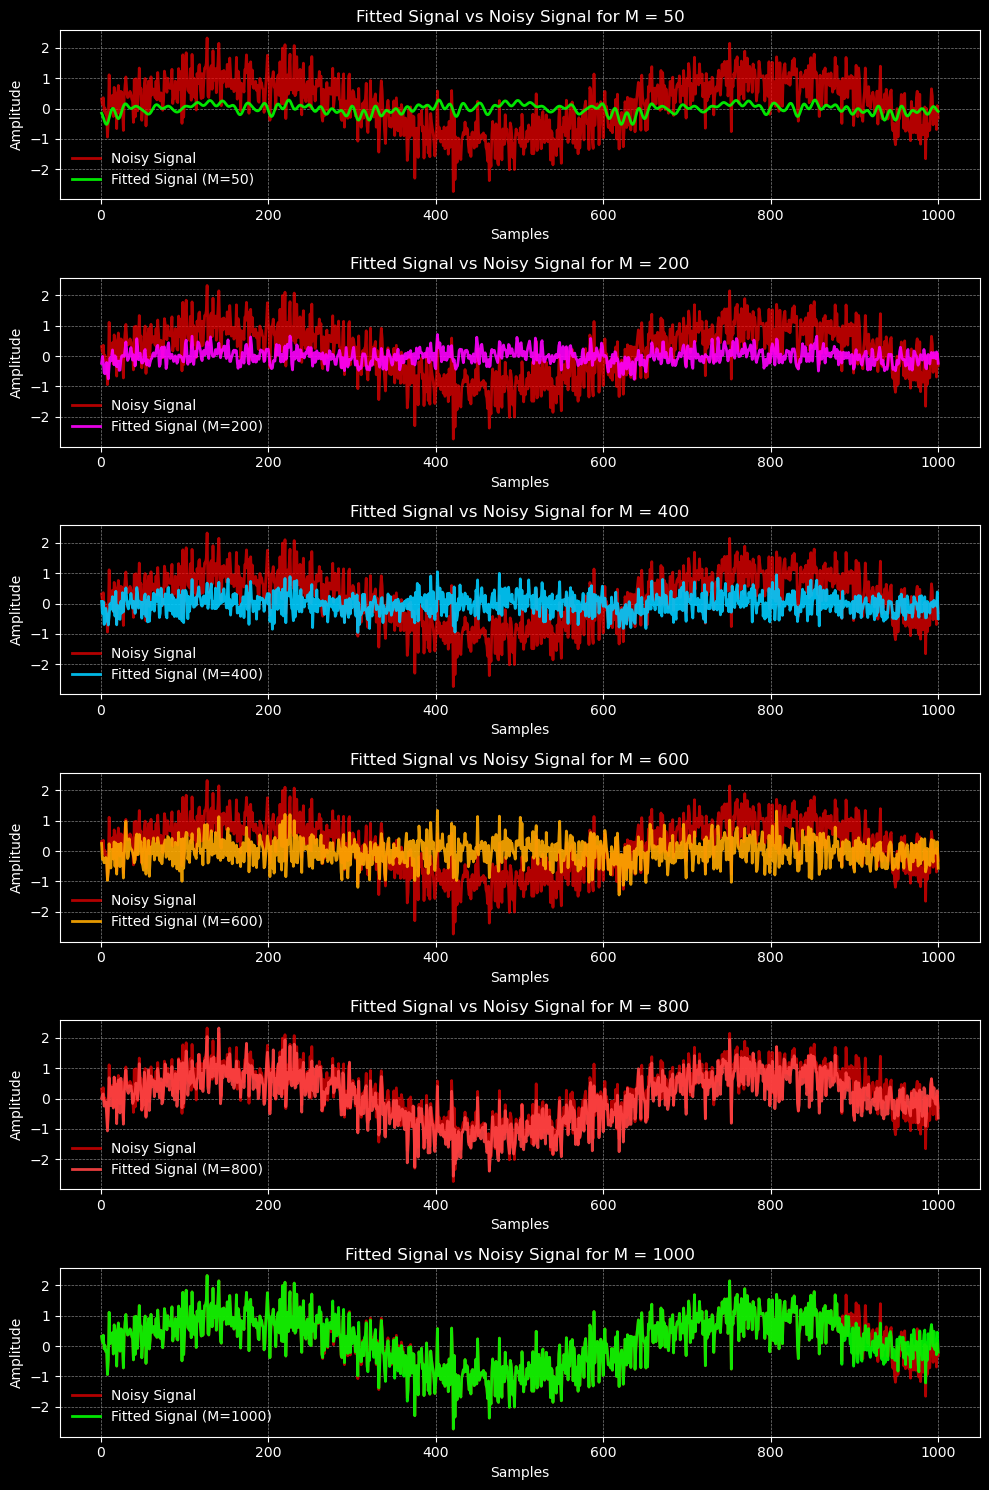

In [3]:
def generate_signal(signal_length, noise_std_dev):
    time_steps = np.arange(1, signal_length + 1)
    true_signal = np.sin(0.01 * time_steps)
    noise = noise_std_dev * np.random.randn(signal_length)
    noisy_signal = true_signal + noise
    return time_steps, true_signal, noisy_signal

def construct_cosine_basis(time_steps, num_terms):
    return np.array([
        np.cos(0.01 * time_steps * m) for m in range(1, num_terms + 1)
    ]).T

def fit_signal_regularized(noisy_signal, cosine_basis, regularization=1e-6):
    num_features = cosine_basis.shape[1]
    identity_matrix = np.eye(num_features) * regularization
    coefficients = np.linalg.lstsq(
        cosine_basis.T @ cosine_basis + identity_matrix, 
        cosine_basis.T @ noisy_signal, 
        rcond=None
    )[0]
    return cosine_basis @ coefficients

def compute_aic(sse, num_samples, num_params):
    return num_samples * np.log(sse / num_samples) + 2 * num_params

def analyze_signal(signal_length=1000, max_cosine_terms=1000, noise_std_dev=0.5):
    time_steps, true_signal, noisy_signal = generate_signal(signal_length, noise_std_dev)
    
    sse = np.zeros(max_cosine_terms)
    aic = np.zeros(max_cosine_terms)
    fitted_signals = {}
    
    for num_terms in range(1, max_cosine_terms + 1):
        cosine_basis = construct_cosine_basis(time_steps, num_terms)
        try:
            reconstructed_signal = fit_signal_regularized(noisy_signal, cosine_basis)
            sse[num_terms - 1] = np.sum((noisy_signal - reconstructed_signal) ** 2)
            aic[num_terms - 1] = compute_aic(sse[num_terms - 1], signal_length, num_terms)
        except np.linalg.LinAlgError as e:
            print(f"Linear Algebra error at M={num_terms}: {e}")
            sse[num_terms - 1] = np.nan
            aic[num_terms - 1] = np.nan
            continue
        
        if num_terms in [50, 200, 400, 600, 800, 1000]:
            fitted_signals[num_terms] = reconstructed_signal
            
    return time_steps, noisy_signal, sse, aic, fitted_signals

def plot_sse(sse):
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(sse) + 1), sse, color="#00ccff", linewidth=2)
    plt.title("Sum Square Error vs Number of Cosine Terms (M)", fontsize=14, color="white")
    plt.xlabel("Number of Cosine Terms (M)", fontsize=12, color="white")
    plt.ylabel("Sum Square Error", fontsize=12, color="white")
    plt.grid(color="gray", linestyle="--", linewidth=0.5)
    plt.show()

def plot_aic(aic):
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(aic) + 1), aic, color="#ffaa00", linewidth=2)
    plt.title("Akaike Information Criterion (AIC) vs Number of Cosine Terms (M)", fontsize=14, color="white")
    plt.xlabel("Number of Cosine Terms (M)", fontsize=12, color="white")
    plt.ylabel("AIC", fontsize=12, color="white")
    plt.grid(color="gray", linestyle="--", linewidth=0.5)
    plt.show()

def plot_fitted_signals(time_steps, noisy_signal, fitted_signals):
    plt.style.use('dark_background')
    selected_colors = ['#00ff00', '#ff00ff', '#00ccff', '#ffaa00', '#ff4444']
    selected_terms = list(fitted_signals.keys())
    num_plots = len(selected_terms)
    
    plt.figure(figsize=(10, 15))
    for i, terms in enumerate(selected_terms):
        plt.subplot(num_plots, 1, i + 1)
        plt.plot(time_steps, noisy_signal, label="Noisy Signal", linewidth=2, color="red", alpha=0.7)
        plt.plot(time_steps, fitted_signals[terms], label=f"Fitted Signal (M={terms})",
                 linewidth=2, color=selected_colors[i % len(selected_colors)], alpha=0.9)
        plt.title(f"Fitted Signal vs Noisy Signal for M = {terms}", fontsize=12, color="white")
        plt.xlabel("Samples", fontsize=10, color="white")
        plt.ylabel("Amplitude", fontsize=10, color="white")
        plt.legend(fontsize=10, frameon=False)
        plt.grid(color="gray", linestyle="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    signal_length = 1000
    max_cosine_terms = 1200
    noise_std_dev = 0.5

    time_steps, noisy_signal, sse, aic, fitted_signals = analyze_signal(
        signal_length, max_cosine_terms, noise_std_dev
    )

    plot_sse(sse)
    plot_aic(aic)
    plot_fitted_signals(time_steps, noisy_signal, fitted_signals)


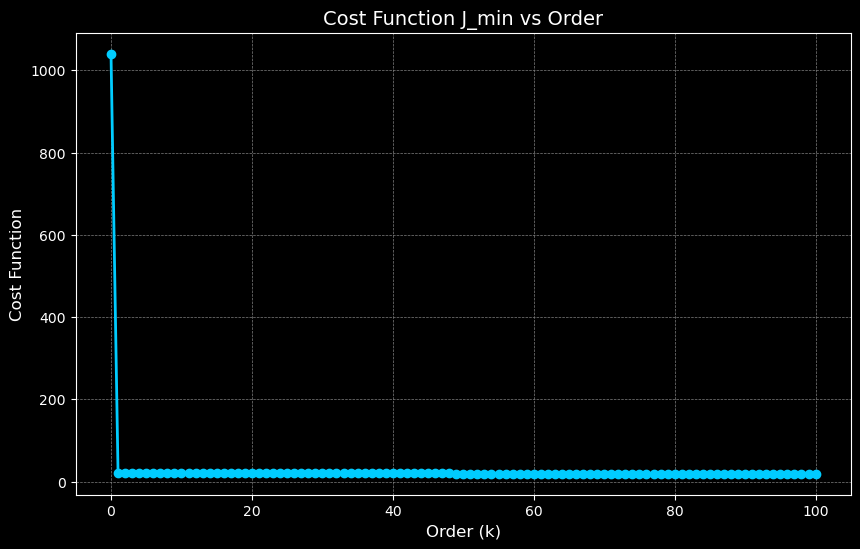

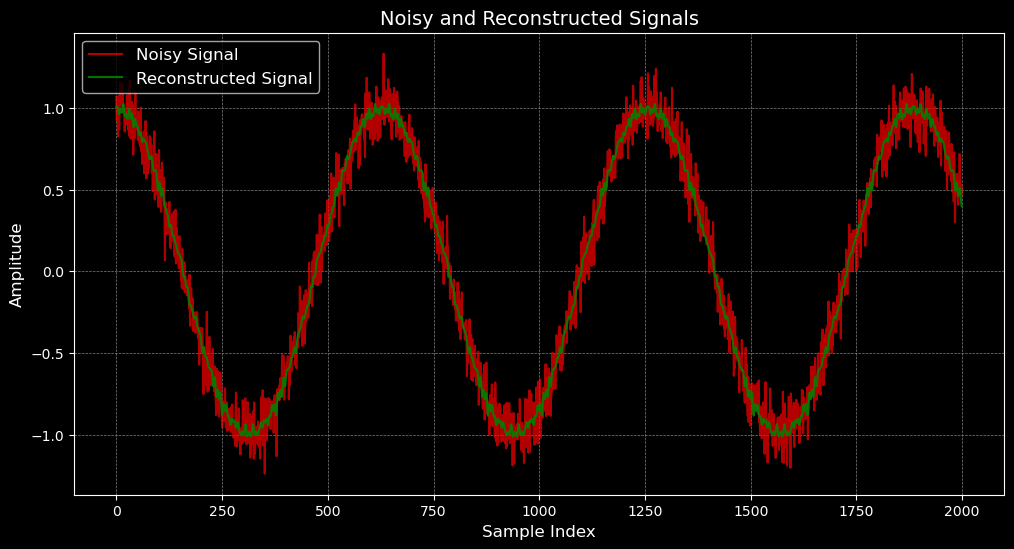

Estimated Coefficients (Theta):
[ 1.00057105e+00  2.25860255e-03 -3.58801592e-03  2.37558617e-03
 -3.52730251e-03 -1.25599303e-03 -3.07764431e-03  7.41199430e-04
  3.29253098e-03 -4.12773777e-03 -2.71625782e-03  2.24622795e-03
  1.31847608e-03 -1.92184649e-03 -3.91388337e-03  4.86911115e-03
  4.52574386e-03 -9.52220985e-04 -1.52560232e-03  2.25966020e-03
 -3.21740345e-03  2.45505755e-04  3.48017482e-04 -7.04653610e-04
 -3.51672618e-03 -6.10053960e-04  2.18498828e-03 -2.30295515e-03
  6.02105044e-03 -3.10744251e-03 -9.50917749e-04 -5.56633845e-03
  1.94848371e-03  1.37759561e-03  7.43330833e-04  3.76405963e-03
  3.58884604e-03  1.27676497e-03  5.48853661e-03 -1.45679502e-03
  6.77838815e-03  6.07185495e-04 -8.09518095e-04  2.69808278e-04
  1.60775480e-03  4.41344888e-03 -2.27816254e-03  9.35498733e-04
 -2.74457024e-03 -2.91836705e-03 -9.07700096e-04 -1.17692508e-03
  2.51643961e-03  5.22459635e-03 -2.88933971e-03 -3.14332091e-04
  1.69073971e-03 -4.18660984e-03  2.24248681e-04 -2.958394

In [4]:

def generate_signal(num_samples, omega, noise_std_dev):
    sample_indices = np.arange(num_samples)
    clean_signal = np.cos(omega * sample_indices)
    noise = noise_std_dev * np.random.randn(num_samples)
    noisy_signal = clean_signal + noise
    return sample_indices, clean_signal, noisy_signal

def construct_basis_matrix(num_samples, max_order, omega):
    sample_indices = np.arange(num_samples)
    basis_matrix = np.zeros((num_samples, max_order))
    for order in range(1, max_order + 1):
        basis_matrix[:, order - 1] = np.cos(order * omega * sample_indices)
    return basis_matrix

def recursive_estimation(noisy_signal, basis_matrix, max_order):
    num_samples = len(noisy_signal)
    estimated_coefficients = np.zeros(max_order)
    cost_function = np.zeros(max_order + 1)
    cost_function[0] = np.linalg.norm(noisy_signal) ** 2  

    for order in range(1, max_order + 1):
        current_basis = basis_matrix[:, :order]
        theta_k = np.linalg.lstsq(current_basis, noisy_signal, rcond=None)[0]
        residual = noisy_signal - current_basis @ theta_k
        cost_function[order] = np.linalg.norm(residual) ** 2
        estimated_coefficients[:order] = theta_k

    return estimated_coefficients, cost_function

def reconstruct_signal(basis_matrix, estimated_coefficients):
    return basis_matrix @ estimated_coefficients

def plot_cost_function(cost_function, max_order):
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 6))
    plt.plot(range(max_order + 1), cost_function, '-o', color="#00ccff", linewidth=2)
    plt.xlabel("Order (k)", fontsize=12, color="white")
    plt.ylabel("Cost Function", fontsize=12, color="white")
    plt.title("Cost Function J_min vs Order", fontsize=14, color="white")
    plt.grid(color="gray", linestyle="--", linewidth=0.5)
    plt.show()

def plot_signals(sample_indices, clean_signal, noisy_signal, reconstructed_signal):
    plt.style.use('dark_background')
    plt.figure(figsize=(12, 6))
    plt.plot(sample_indices, noisy_signal, color="red", label="Noisy Signal", alpha=0.7)
    plt.plot(sample_indices, reconstructed_signal, color="green", label="Reconstructed Signal", alpha=0.9)
    plt.xlabel("Sample Index", fontsize=12, color="white")
    plt.ylabel("Amplitude", fontsize=12, color="white")
    plt.title("Noisy and Reconstructed Signals", fontsize=14, color="white")
    plt.legend(fontsize=12)
    plt.grid(color="gray", linestyle="--", linewidth=0.5)
    plt.show()

def main():
    num_samples = 2000
    omega = 0.01  
    noise_std_dev = 0.1 
    max_order = 100

    sample_indices, clean_signal, noisy_signal = generate_signal(num_samples, omega, noise_std_dev)

    basis_matrix = construct_basis_matrix(num_samples, max_order, omega)

    estimated_coefficients, cost_function = recursive_estimation(noisy_signal, basis_matrix, max_order)

    reconstructed_signal = reconstruct_signal(basis_matrix, estimated_coefficients)

    plot_cost_function(cost_function, max_order)
    plot_signals(sample_indices, clean_signal, noisy_signal, reconstructed_signal)

    print("Estimated Coefficients (Theta):")
    print(estimated_coefficients)

if __name__ == "__main__":
    main()
